# Practical work 4: Frequency filtering, color

In [17]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift
import matplotlib.pyplot as plt
from PIL import Image

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()


## Exercice 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

In [18]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(1+np.abs(If))


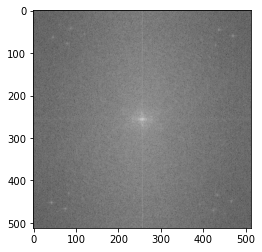

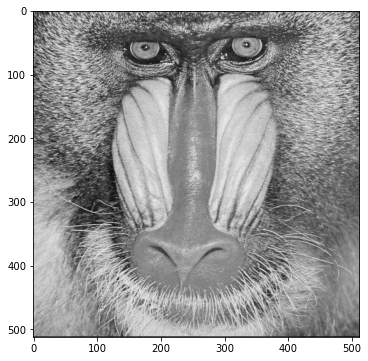

In [19]:
mandrill = np.array(Image.open('img/mandrill.png'))
mandrillFT=computeFT(mandrill)
plt.imshow(toVisualizeLogFT((fftshift(mandrillFT))))
plt.show()
imshow(mandrill)


2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

In [20]:
def idealLowPassFilter(n,m,fc):
    filtre=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            if np.sqrt((i-(n-1)/2)**2+(j-(m-1)/2)**2)<=fc:
                filtre[i,j]=1
            else:
                filtre[i,j]=0
    return filtre

idealLowPassFilter(5,5,2)

array([[0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.]])

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (function `ifft2()` from module `numpy.fft`
 - return the real part of filtered image

In [21]:
def lowPass(I,fc):
    ITF=fftshift(fft2(I))
    matrice=ITF*idealLowPassFilter(ITF.shape[0],ITF.shape[1],fc)
    uncentredTF=np.fft.ifftshift(matrice)
    inverseTF=ifft2(uncentredTF)
    return np.real(inverseTF)
    
    

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


Pour Fc=100 :



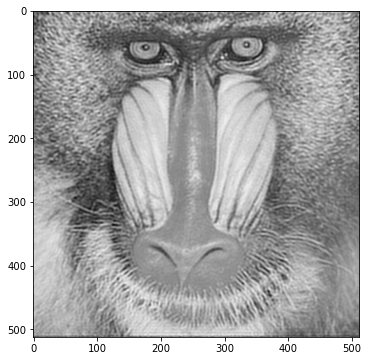

Pour Fc=50 :



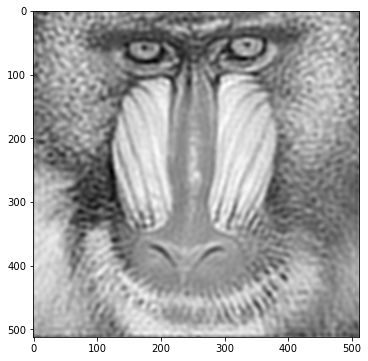

Pour Fc=25 :



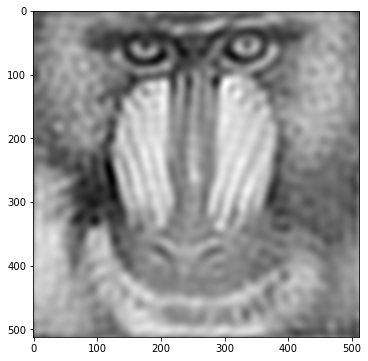

In [22]:
mandrill = np.array(Image.open('img/mandrill.png'))

print("Pour Fc=100 :\n")
imshow(lowPass(mandrill,100))

print("Pour Fc=50 :\n")
imshow(lowPass(mandrill,50))

print("Pour Fc=25 :\n")
imshow(lowPass(mandrill,25))

Pour Fc=100 :



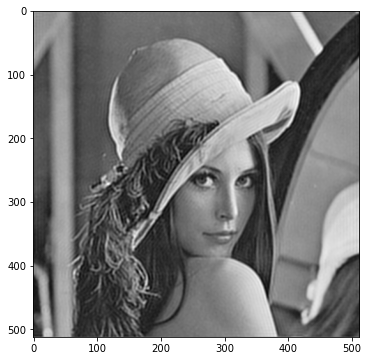

Pour Fc=50 :



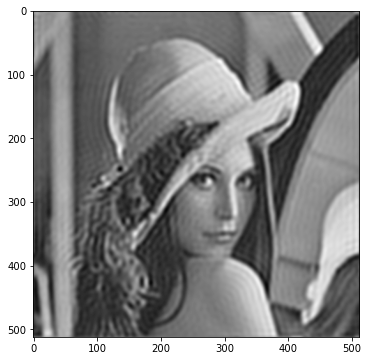

Pour Fc=25 :



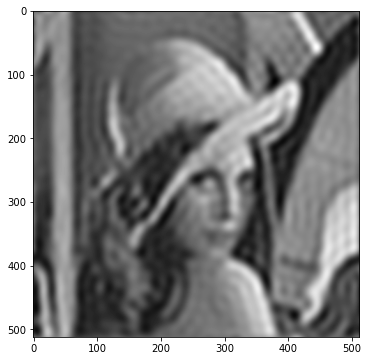

In [23]:
lena = np.array(Image.open('img/lena.jpg'))

print("Pour Fc=100 :\n")
imshow(lowPass(lena,100))

print("Pour Fc=50 :\n")
imshow(lowPass(lena,50))

print("Pour Fc=25 :\n")
imshow(lowPass(lena,25))

## Exercice 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

In [24]:
def imagePad(I,h):
    n=h.shape[0]
    d=(int)((n-1)/2)
    l=I.shape[0]
    c=I.shape[1]
    matrice=I.copy()
    matrice=np.append(matrice,np.zeros((d,c)),axis=0)
    matrice=np.insert(matrice,0,np.zeros((d,c)),axis=0)
    matrice=np.insert(matrice,0,np.zeros((d,l+2*d)),axis=1)
    matrice=np.append(matrice,np.zeros((l+d*2,d)),axis=1)
    
    return matrice
    
imagePad(np.ones((4,4)),np.ones((5,5)))
    

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [25]:
def conv2(I,h):
    n=h.shape[0]
    d=(int)((n-1)/2)
    l=I.shape[0]
    c=I.shape[1]
    hInverse=h.copy()
    
    for i in range(n):
        for j in range(n):
            hInverse[i,j]=h[n-1-i,n-1-j]
    
    matrice1=imagePad(I,h)
    matrice2=matrice1.copy()
    for i1 in range(l):
        for j1 in range(c):
            for i2 in range(n):
                for j2 in range(n):
                    matrice1[i1+d,j1+d]=np.sum(hInverse*matrice2[i1:i1+d*2+1,j1:j1+d*2+1])
    return matrice1

conv2(np.ones((4,4)),np.ones((5,5)))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 12., 12.,  9.,  0.,  0.],
       [ 0.,  0., 12., 16., 16., 12.,  0.,  0.],
       [ 0.,  0., 12., 16., 16., 12.,  0.,  0.],
       [ 0.,  0.,  9., 12., 12.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

Test du Filtre moyenneur de taille 3X3 :



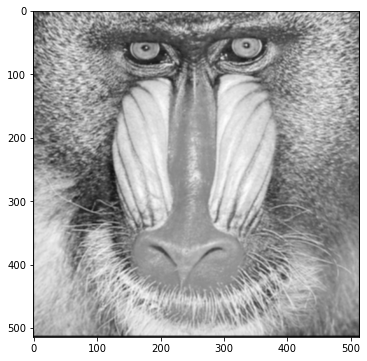

Test du Filtre moyenneur de taille 5X5 :



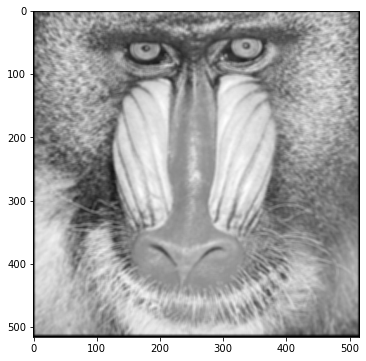

Test du Filtre moyenneur de taille 7X7 :



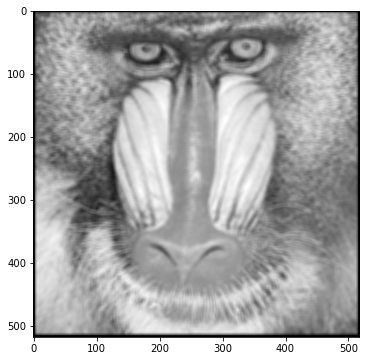

In [9]:
print("Test du Filtre moyenneur de taille 3X3 :\n")
filtre1=1/(3**2)*np.ones((3,3))
imshow(conv2(mandrill,filtre1))

print("Test du Filtre moyenneur de taille 5X5 :\n")
filtre2=1/(5**2)*np.ones((5,5))
imshow(conv2(mandrill,filtre2))

print("Test du Filtre moyenneur de taille 7X7 :\n")
filtre3=1/(7**2)*np.ones((7,7))
imshow(conv2(mandrill,filtre3))

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

La fonction de transfert du Filtre de taille 3X3 :



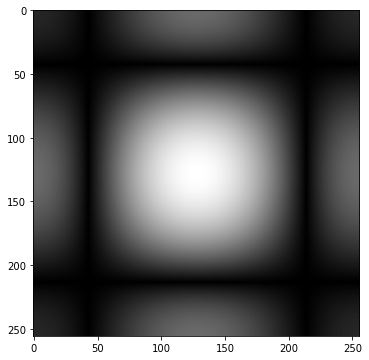

La fonction de transfert du Filtre de taille 5X5 :



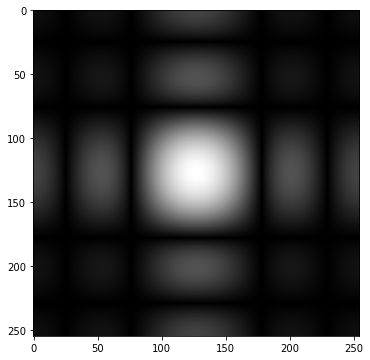

La fonction de transfert du Filtre de taille 7X7 :



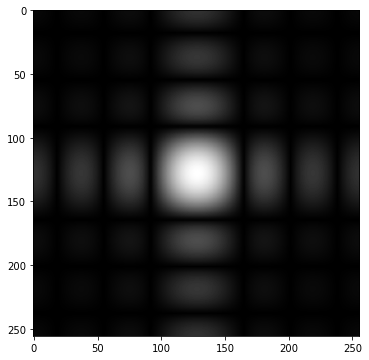

In [26]:
def zeroPadding256(F):  #Zero-padding technique to obtain a filter with a large size (256X256)
    n=F.shape[0]
    m=F.shape[1]
    
    d1=(int)((256-n)/2)
    if (d1%2==0):
        d2=d1+1
    else:
        d2=d1
        
    matrice=F.copy()
    matrice=np.append(matrice,np.zeros((d1,m)),axis=0)
    matrice=np.insert(matrice,0,np.zeros((d2,m)),axis=0)
    matrice=np.insert(matrice,0,np.zeros((d1,n+d1+d2)),axis=1)
    matrice=np.append(matrice,np.zeros((n+d1+d2,d2)),axis=1)
    
    return matrice
    
    
print("La fonction de transfert du Filtre de taille 3X3 :\n")
imshow(toVisualizeLogFT(fftshift(fft2(zeroPadding256(filtre1)))))

print("La fonction de transfert du Filtre de taille 5X5 :\n")
imshow(toVisualizeLogFT(fftshift(fft2(zeroPadding256(filtre2)))))

print("La fonction de transfert du Filtre de taille 7X7 :\n")
imshow(toVisualizeLogFT(fftshift(fft2(zeroPadding256(filtre3)))))


6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

Pour avoir un filtre gaussien de taille 3X3 il faut que sigma=  0.3333333333333333  

La fonction de transfert du filtre obtenue :



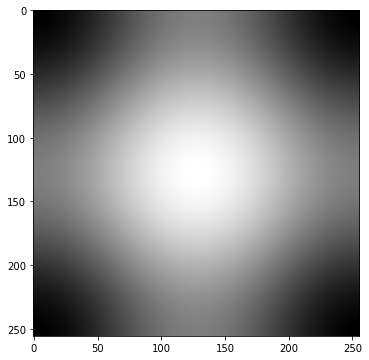

Pour avoir un filtre gaussien de taille 5X5 il faut que sigma=  0.6666666666666666  

La fonction de transfert du filtre obtenue :



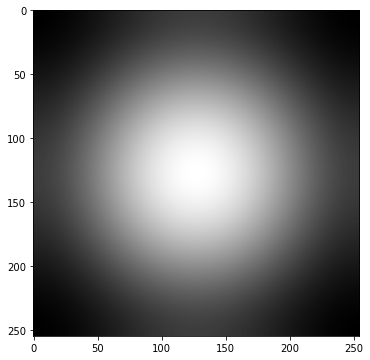

Pour avoir un filtre gaussien de taille 7X7 il faut que sigma=  1.0  

La fonction de transfert du filtre obtenue :



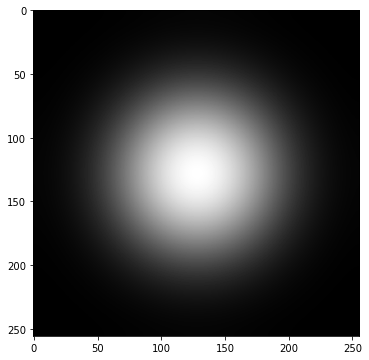

In [27]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = np.int(3*sigma)
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()
### your answer start below

# on sait que la taille du filtre gaussian est de 2*[3*sigma]+1
L=3  # pour le filtre 3X3
sigma=((L-1)/6)
print("Pour avoir un filtre gaussien de taille 3X3 il faut que sigma= ",sigma," \n")
print("La fonction de transfert du filtre obtenue :\n")
imshow(toVisualizeLogFT(fftshift(fft2(zeroPadding256(gaussianKernel(sigma))))))

L=5  # pour le filtre 5X5
sigma=((L-1)/6)
print("Pour avoir un filtre gaussien de taille 5X5 il faut que sigma= ",sigma," \n")
print("La fonction de transfert du filtre obtenue :\n")
imshow(toVisualizeLogFT(fftshift(fft2(zeroPadding256(gaussianKernel(sigma))))))

L=7  # pour le filtre 7X7
sigma=((L-1)/6)
print("Pour avoir un filtre gaussien de taille 7X7 il faut que sigma= ",sigma," \n")
print("La fonction de transfert du filtre obtenue :\n")
imshow(toVisualizeLogFT(fftshift(fft2(zeroPadding256(gaussianKernel(sigma))))))

## Exercice 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

L'image originale de barbara :



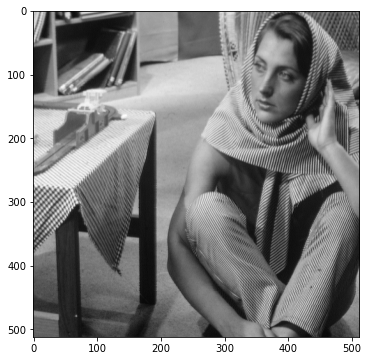

L'image de barbara après sous-échantillonnage :



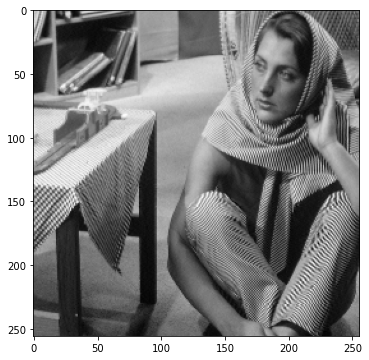

In [28]:
def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]
barbara=np.array(Image.open('img/barbara.png'))
barbaraSubSampled=subSample2(barbara)

print("L'image originale de barbara :\n")
imshow(barbara)

print("L'image de barbara après sous-échantillonnage :\n")
imshow(barbaraSubSampled)

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

Image Filtrée avec le filtre AntiAliasing :



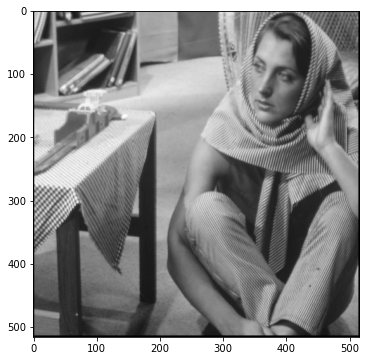

Image aprés sous-échantillonnage :



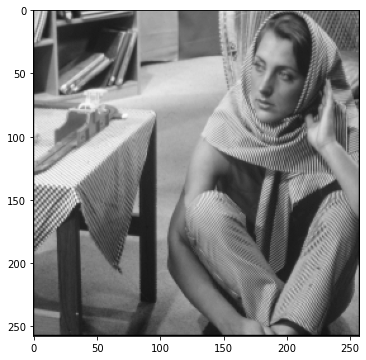

In [29]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A



imageFiltree=conv2(barbara,antiAliasingFilter(5,5))
print("Image Filtrée avec le filtre AntiAliasing :\n")
imshow(imageFiltree)

print("Image aprés sous-échantillonnage :\n")
imageFiltreeSubSampled=subSample2(imageFiltree)
imshow(imageFiltreeSubSampled)

3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

## Exercice 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images examine their shape. What difference there are between them?

L'image clown :

taille de l'image : (512, 512, 3)


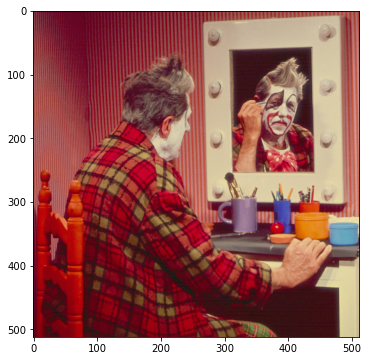

L'image clown_lumi :

taille de l'image : (512, 512)


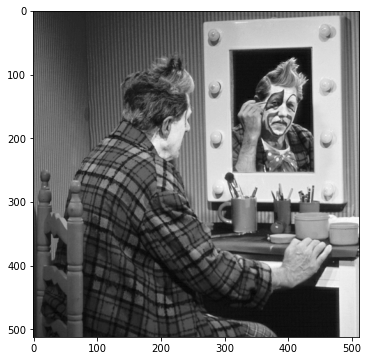

In [385]:
I1=np.array(Image.open('img/clown.bmp'))
I2=np.array(Image.open('img/clown_lumi.bmp'))

print("L'image clown :\n")
print("taille de l'image :",I1.shape)
imshow(I1)


print("L'image clown_lumi :\n")
print("taille de l'image :",I2.shape)
imshow(I2)

On remarque que l'image clown est en couleur et elle est de taille (512,512,3) contrairement à l'image clown_lumi qui est en noir et blanc avec une taille de (512,512)

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

La composante Rouge de l'image :



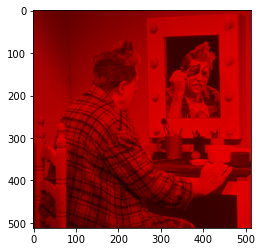

La composante Rouge de l'image en 2 dimensions :



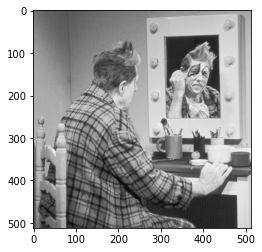

La composante Verte de l'image :



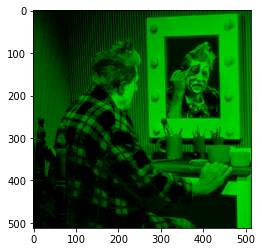

La composante Verte de l'image en 2 dimensions :



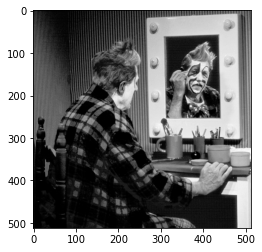

La composante Blue de l'image :



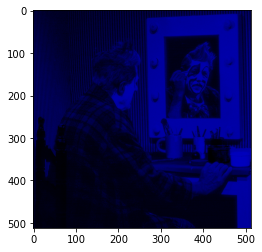

La composante Blue de l'image en 2 dimensions :



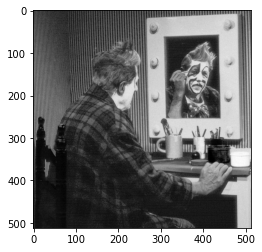

In [14]:
clown=Image.open('img/clown.bmp')
I1=np.array(clown)

print("La composante Rouge de l'image :\n")
IR=np.zeros((512,512,3),dtype=np.uint8)
IR[:,:,0]=I1[:,:,0]
plt.imshow(IR)
plt.show()
print("La composante Rouge de l'image en 2 dimensions :\n")
plt.imshow(I1[:,:,0])
plt.show()

print("La composante Verte de l'image :\n")
IG=np.zeros((512,512,3),dtype=np.uint8)
IG[:,:,1]=I1[:,:,1]
plt.imshow(IG)
plt.show()
print("La composante Verte de l'image en 2 dimensions :\n")
plt.imshow(I1[:,:,1])
plt.show()

print("La composante Blue de l'image :\n")
IB=np.zeros((512,512,3),dtype=np.uint8)
IB[:,:,2]=I1[:,:,2]
plt.imshow(IB)
plt.show()
print("La composante Blue de l'image en 2 dimensions :\n")
plt.imshow(I1[:,:,2])
plt.show()



3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

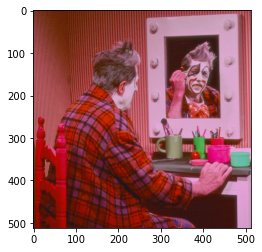

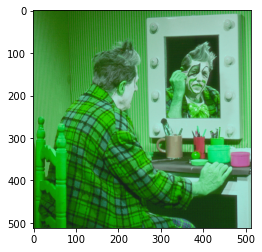

In [15]:
I3=np.zeros((512,512,3),dtype=np.uint8)
I3[:,:,0]=IR[:,:,0]
I3[:,:,1]=IB[:,:,2]
I3[:,:,2]=IG[:,:,1]
plt.imshow(I3)
plt.show()

I4=np.zeros((512,512,3),dtype=np.uint8)
I4[:,:,0]=IB[:,:,2]
I4[:,:,1]=IR[:,:,0]
I4[:,:,2]=IG[:,:,1]
plt.imshow(I4)
plt.show()

4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

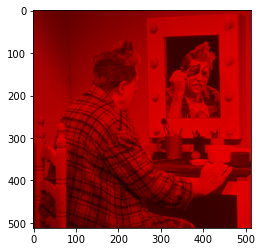

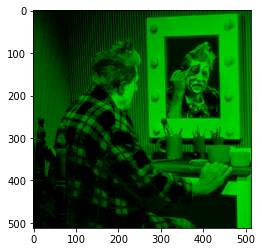

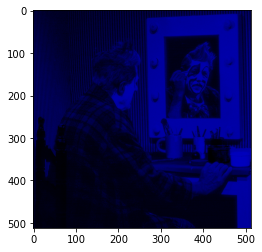

In [16]:
def getChannelRGB(image,mode):
    """ 
    Mode= { R, G, B}
    """
    I=np.zeros((512,512,3),dtype=np.uint8)
    I1=np.array(image)
    if(mode=='R'):
        I[:,:,0]=I1[:,:,0]
    elif(mode=='G'):
        I[:,:,1]=I1[:,:,1]
    elif(mode=='B'):
        I[:,:,2]=I1[:,:,2]
    else:
        print("Mode ={ R, G, B} !")
        
    plt.imshow(I)
    plt.show()
    
    
clown=Image.open('img/clown.bmp')
getChannelRGB(clown,'R')
getChannelRGB(clown,'G')
getChannelRGB(clown,'B')
